<a href="https://colab.research.google.com/github/WCosmo/DL-Team-Project-1/blob/main/santander_kaggle_challenger_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
import kaggle

In [ ]:
!kaggle competitions download -c santander-customer-satisfaction

  0% 0.00/8.25M [00:00<?, ?B/s]
100% 8.25M/8.25M [00:00<00:00, 103MB/s]


In [ ]:
!unzip -q santander-customer-satisfaction.zip 


In [ ]:
import pandas as pd
customer_data = pd.read_csv("train.csv")
customer_data_test = pd.read_csv("test.csv")

In [ ]:
customer_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
customer_data_corr = customer_data.corr()

In [ ]:
idx = customer_data_corr.index[customer_data_corr['TARGET']>=0.01]

In [ ]:
customer_data[idx]

,var15,imp_op_var39_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_comer_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,...,num_med_var22_ult3,num_meses_var8_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var17_ult1,TARGET
0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,37,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
76016,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,0,0,0,0,0,0,0,0,0
76017,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
76018,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
np.random.seed(42)

In [ ]:
train_set, test_set = split_train_test(customer_data[idx], 0.2)

In [ ]:
X_train = train_set.values[:,0:42]
X_validation  = test_set.values[:,0:42]

In [ ]:
X_train.shape #debug

(60816, 42)

In [ ]:
y_train = train_set.values[:,43]
y_validation  = test_set.values[:,43]
y_train.shape

(60816,)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[42]))

#1st fully connected Neural Network hidden-layer
model.add(keras.layers.Dense(160))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Activation('sigmoid'))

#2nd fully connected Neural Network hidden-layer
model.add(keras.layers.Dense(40))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 160)               6880      
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 activation (Activation)     (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 40)                6440      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 activation_1 (Activation)   (None, 40)                0

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.5, decay=1e-6, momentum=0.9) #optimizer

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
epch = 10

In [ ]:
history = model.fit(X_train, y_train, epochs=epch, validation_data=(X_validation, y_validation))

Epoch 1/10
1901/1901 [==============================] - 5s 2ms/step - loss: 0.1485 - accuracy: 0.9605 - val_loss: 0.1512 - val_accuracy: 0.9601
Epoch 2/10
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1485 - accuracy: 0.9605 - val_loss: 0.1512 - val_accuracy: 0.9601
Epoch 3/10
1901/1901 [==============================] - 5s 3ms/step - loss: 0.1482 - accuracy: 0.9605 - val_loss: 0.1509 - val_accuracy: 0.9601
Epoch 4/10
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1484 - accuracy: 0.9605 - val_loss: 0.1512 - val_accuracy: 0.9601
Epoch 5/10
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1477 - accuracy: 0.9605 - val_loss: 0.1513 - val_accuracy: 0.9601
Epoch 6/10
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1477 - accuracy: 0.9605 - val_loss: 0.1509 - val_accuracy: 0.9601
Epoch 7/10
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1481 - accuracy: 0.9605 - val_loss: 0.1507 - val_accuracy:

In [ ]:
history_dict = history.history 
loss_values = history_dict['loss'] #Training loss
val_loss_values = history_dict['val_loss'] #Validation loss
accuracy = history_dict['accuracy'] #Training accuracy
val_accuracy = history_dict['val_accuracy'] #Validation accuracy
import matplotlib.pyplot as plt

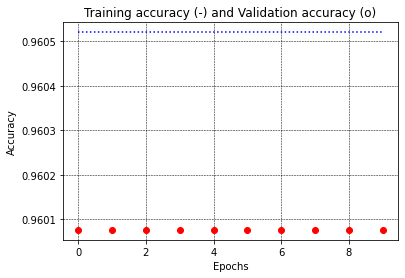

In [ ]:
# Training accuracy (-) and Validation accuracy (o)
plt.plot(np.arange(epch), accuracy, linestyle = 'dotted', color = 'b', label='Training accuracy') #plot da acurácia de treinamento
plt.plot(np.arange(epch), val_accuracy, 'o', color = 'r', label='Validation accuracy') #plot da acurácia de validação
plt.title('Training accuracy (-) and Validation accuracy (o)')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

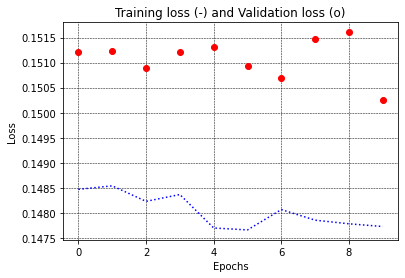

In [ ]:
# Training loss (-) and Validation loss (o)
plt.plot(np.arange(epch), loss_values, linestyle = 'dotted', color = 'b', label='Training loss') 
plt.plot(np.arange(epch), val_loss_values, 'o', color = 'r', label='Validation loss') 
plt.title('Training loss (-) and Validation loss (o)')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
idx.drop('TARGET')

Index(['var15', 'imp_op_var39_comer_ult1', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var41_comer_ult1',
       'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3',
       'imp_op_var41_ult1', 'imp_op_var39_efect_ult1',
       'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var8_0',
       'ind_var8', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte',
       'ind_var26', 'ind_var25_0', 'ind_var25', 'num_var8_0', 'num_var8',
       'num_var26_0', 'num_var26', 'num_var25_0', 'num_var25',
       'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_ult1',
       'num_op_var39_ult3', 'saldo_var40', 'var36', 'ind_var10_ult1',
       'num_var22_ult1', 'num_var22_ult3', 'num_med_var22_ult3',
       'num_meses_var8_ult3', 'num_op_var40_efect_ult1',
       'num_op_var40_efect_ult3', 'num_op_var41_efect_ult1',
       'num_op_var41_efect_ult3', 'num_op_var39_efect_ult1',
       'num_op_var39_efect_ult3', 'num_reemb_var17_ult1'],
      dtype='object')

In [ ]:
# X_train = train_set.values[:,0:369]
X_test = customer_data_test[idx.drop('TARGET')].values[:,0:42]

In [ ]:
y_proba = model.predict(X_validation)

In [ ]:
y_proba.shape #debug

(15204, 1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import seaborn as sns

In [ ]:
fpr, tpr, thresholds = roc_curve(y_validation,y_proba)

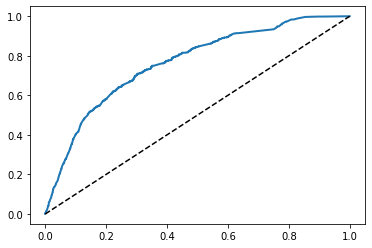

In [ ]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_validation, y_proba)

0.7633863630438382

In [ ]:
cf = confusion_matrix(y_validation, np.round(y_proba))

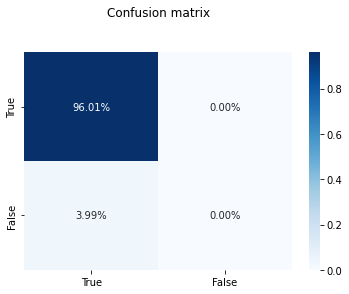

In [ ]:
ax = plt.subplots()
ax = sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Confusion matrix\n\n');
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()